# **Ortalama Kaydırmalı Kümeleme Tekniği**

*Ortalama kaydırmalı kümeleme, düzgün bir örnek yoğunluğundaki lekeleri keşfetmeyi amaçlar. Centroid tabanlı bir algoritmadır ve centroid adaylarını belirli bir bölge içindeki noktaların ortalaması olacak şekilde güncelleyerek çalışır. Bu adaylar daha sonra son merkez kümesini oluşturmak üzere yakın kopyaları ortadan kaldırmak için işlem sonrası bir aşamada filtrelenir.*

***Algoritma, arama yapılacak bölgenin boyutunu belirleyen bant genişliği parametresine güvenmek yerine küme sayısını otomatik olarak ayarlar.*** *Bu parametre manuel olarak ayarlanabilir, ancak bant genişliği ayarlanmamışsa çağrılan sağlanan estimate_bandwidth işlevi kullanılarak tahmin edilebilir.*

***Algoritmanın yürütülmesi sırasında birden fazla en yakın komşu araması gerektirdiğinden algoritma yüksek oranda ölçeklenebilir değildir.*** *Algoritmanın yakınsaması garanti edilir, ancak algoritma, merkezoidlerdeki değişim küçük olduğunda yinelemeyi durduracaktır.*

# **Sentetik verileri oluşturun**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.cluster import MeanShift
from sklearn import metrics
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)


# Örnek veri oluşturma
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.4, random_state = 101)


In [5]:
X.shape

(300, 2)

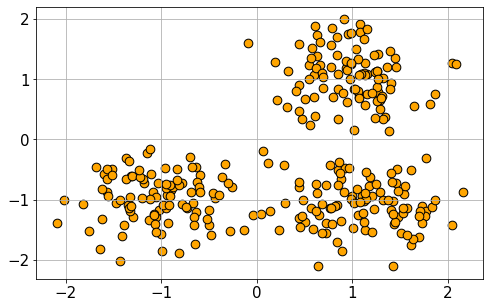

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], edgecolors='k', c='orange', s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Kümeleme**

In [7]:
ms_model = MeanShift().fit(X)
cluster_centers = ms_model.cluster_centers_
labels = ms_model.labels_
n_clusters = len(cluster_centers)
labels = ms_model.labels_

# **Tespit edilen kümelerin sayısı ve merkezleri**

In [8]:
print("Number of clusters detected by the algorithm:", n_clusters)

Number of clusters detected by the algorithm: 3


In [9]:
print("Cluster centers detected at:\n\n", cluster_centers)

Cluster centers detected at:

 [[ 1.09954715 -1.09294823]
 [ 0.9931698   1.05074234]
 [-0.99420039 -0.96765319]]


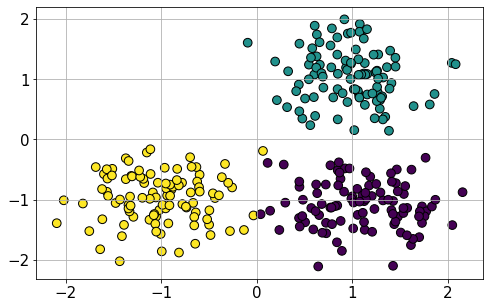

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], edgecolors='k', c=ms_model.labels_, s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Homojenlik**

*Bir zemin gerçeği verilen bir küme etiketlemesinin homojenlik metriği.*

*Bir kümeleme sonucu, tüm kümeleri yalnızca tek bir sınıfın üyesi olan veri noktalarını içeriyorsa homojenliği sağlar. Bu metrik etiketlerin mutlak değerlerinden bağımsızdır: sınıf veya küme etiket değerlerinin permütasyonu skor değerini hiçbir şekilde değiştirmez.*

In [11]:
print("Homogeneity score:", metrics.homogeneity_score(labels_true, labels))

Homogeneity score: 0.9405073022327171


# **Bütünlük**

*Bir temel gerçek verilen bir küme etiketlemesinin tamlık metriği.*

*Bir kümeleme sonucu, belirli bir sınıfın üyesi olan tüm veri noktaları aynı kümenin elemanlarıysa tamlığı sağlar. Bu metrik etiketlerin mutlak değerlerinden bağımsızdır: sınıf veya küme etiket değerlerinin permütasyonu skor değerini hiçbir şekilde değiştirmez.*

In [12]:
print("Completeness score:", metrics.completeness_score(labels_true, labels))

Completeness score: 0.9405073022327171


# **Veri boyutu büyüdükçe zaman karmaşıklığı ve model kalitesi**

In [13]:
import time
from tqdm import tqdm

In [14]:
n_samples = [10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 5000, 7500, 10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_ms = []
homo_ms = []
complete_ms = []

for i in tqdm(n_samples):
  X, labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.4, random_state=101)
  t1 = time.time()
  ms_model = MeanShift().fit(X)
  t2 = time.time()
  t_ms.append(t2-t1)
  homo_ms.append(metrics.homogeneity_score(labels_true, ms_model.labels_))
  complete_ms.append(metrics.completeness_score(labels_true, ms_model.labels_))

100%|██████████| 12/12 [01:55<00:00,  9.59s/it]


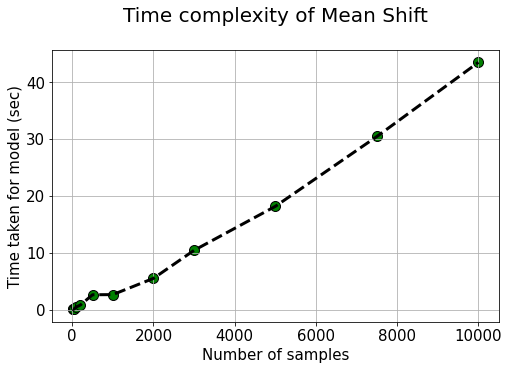

In [18]:
plt.figure(figsize=(8,5))
plt.title("Time complexity of Mean Shift\n",fontsize=20)
plt.scatter(n_samples,t_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,t_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Time taken for model (sec)",fontsize=15)
plt.show()

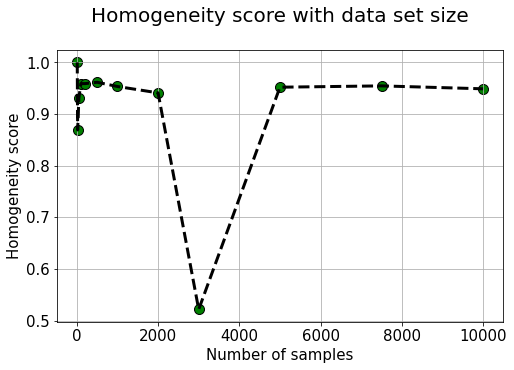

In [19]:
plt.figure(figsize=(8,5))
plt.title("Homogeneity score with data set size\n", fontsize=20)
plt.scatter(n_samples, homo_ms, edgecolors='k', c='green', s=100)
plt.plot(n_samples, homo_ms, 'k--', lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Homogeneity score", fontsize=15)
plt.show()

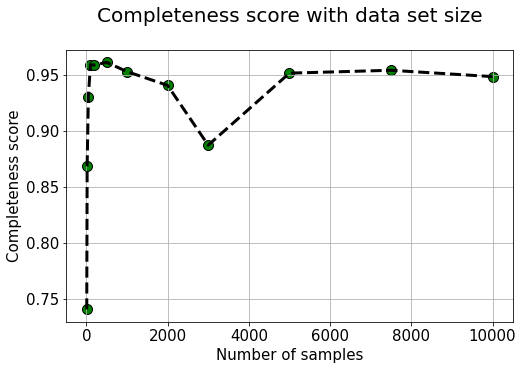

In [22]:
plt.figure(figsize=(8,5))
plt.title("Completeness score with data set size\n",fontsize=20)
plt.scatter(n_samples,complete_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,complete_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Completeness score",fontsize=15)
plt.show()

# **Gürültü varlığında küme tespiti ne kadar iyi çalışır?**

*Farklı derecelerde gürültü std. dev içeren veri kümeleri oluşturun ve kümeleri tespit etmek için modeli çalıştırın.*

In [23]:
noise = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0]
n_clusters = []
for i in noise:
  centers = [[1, 1], [-1, -1], [1, -1]]
  X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i, random_state=101)
  ms_model = MeanShift().fit(X)
  n_clusters.append(len(ms_model.cluster_centers_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


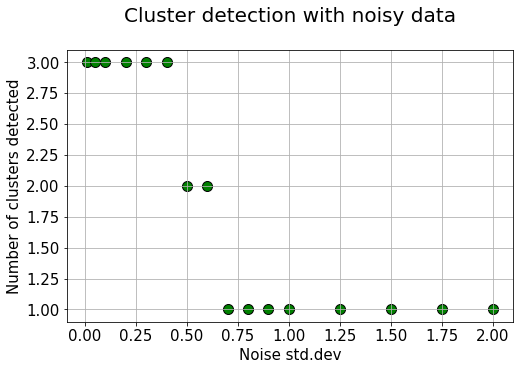

In [24]:
print("Detected number of clusters:", n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data\n", fontsize=20)
plt.scatter(noise, n_clusters, edgecolors='k', c='green', s=100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of clusters detected", fontsize=15)
plt.show()

*Küme tespitinin belirli bir gürültü std. dev seviyesine kadar iyi çalıştığını görüyoruz, bu seviyeden sonra lekelerin ortalaması genel merkeze kayıyor ve tespit edilen küme sayısı 1*